# Treinamento com interface de alto nível

- **Nome:** Maria Eduarda Alves da Silva, **Email:** meas2@cesar.school
- **Nome:** Raphael Friederich Ribeiro Filho, **Email:** rfrf2@cesar.school
- **Link para o Dataset:** https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets


## Importação das bibliotecas

In [1]:
# http://pytorch.org/
from os.path import exists

import torch

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Dataset, random_split
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Leitura dos dados

In [4]:
#caminho raphael
df = pd.read_excel('/content/drive/MyDrive/RNA/Date_Fruit_Datasets.xlsx')

#caminho duda
# df = pd.read_excel('/content/drive/MyDrive/dados/datasets/Date_Fruit_Datasets.xlsx')

df.head(10)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
5,408953,2326.6931,840.1821,622.0076,0.6722,721.5921,0.9974,410036,0.7805,1.3508,...,3.6309,6.0285,6.2159,-41140371456,-33146710016,-27907301376,49.7001,45.3190,39.7371,BERHI
6,451414,2457.2080,889.3253,652.4316,0.6796,758.1281,0.9970,452755,0.7877,1.3631,...,3.0703,3.4163,4.9168,-63711666176,-64060743680,-52603465728,57.8060,58.5449,52.4199,BERHI
7,382636,2275.7791,808.0833,609.2819,0.6569,697.9880,0.9931,385277,0.7032,1.3263,...,3.6756,7.0258,5.3254,-29873577984,-33570080768,-33054025728,45.1768,48.2407,47.2167,BERHI
8,546063,2714.9480,916.3737,766.4536,0.5481,833.8279,0.9882,552598,0.7710,1.1956,...,3.4640,3.7416,4.8120,-95262416896,-79321833472,-69569445888,64.6188,59.9127,55.6509,BERHI
9,420044,2391.1230,836.9280,645.1822,0.6370,731.3116,0.9918,423531,0.7853,1.2972,...,3.3729,4.2898,5.4637,-74341122048,-58172182528,-42640556032,64.9094,58.2771,48.4820,BERHI


## Análise Exploratória dos dados

In [5]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

* Valores nulos

In [7]:
# Checar se existem valores nulos
df.isna().sum()

,0
AREA,0
PERIMETER,0
MAJOR_AXIS,0
MINOR_AXIS,0
ECCENTRICITY,0
EQDIASQ,0
SOLIDITY,0
CONVEX_AREA,0
EXTENT,0
ASPECT_RATIO,0


In [8]:
# Informações do dataset
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


* Transformando o campo target Class de variaveis categoricas para numericas

In [9]:
df['Class'].unique()
dict_class = {'BERHI':0, 'DEGLET': 1, 'DOKOL':2, 'IRAQI': 3, 'ROTANA': 4, 'SAFAVI': 5, 'SOGAY': 6}

In [10]:
df['Class'] = df['Class'].map(dict_class)

* Verificando as correlações de acordos com suas características

In [11]:
grupo_morfo = ['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO','ROUNDNESS', 'COMPACTNESS','Class']
grupo_shape = ['SHAPEFACTOR_1', 'SHAPEFACTOR_2', 'SHAPEFACTOR_3', 'SHAPEFACTOR_4','Class']
grupo_color = ['MeanRR', 'MeanRG', 'MeanRB', 'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG', 'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB','Class']

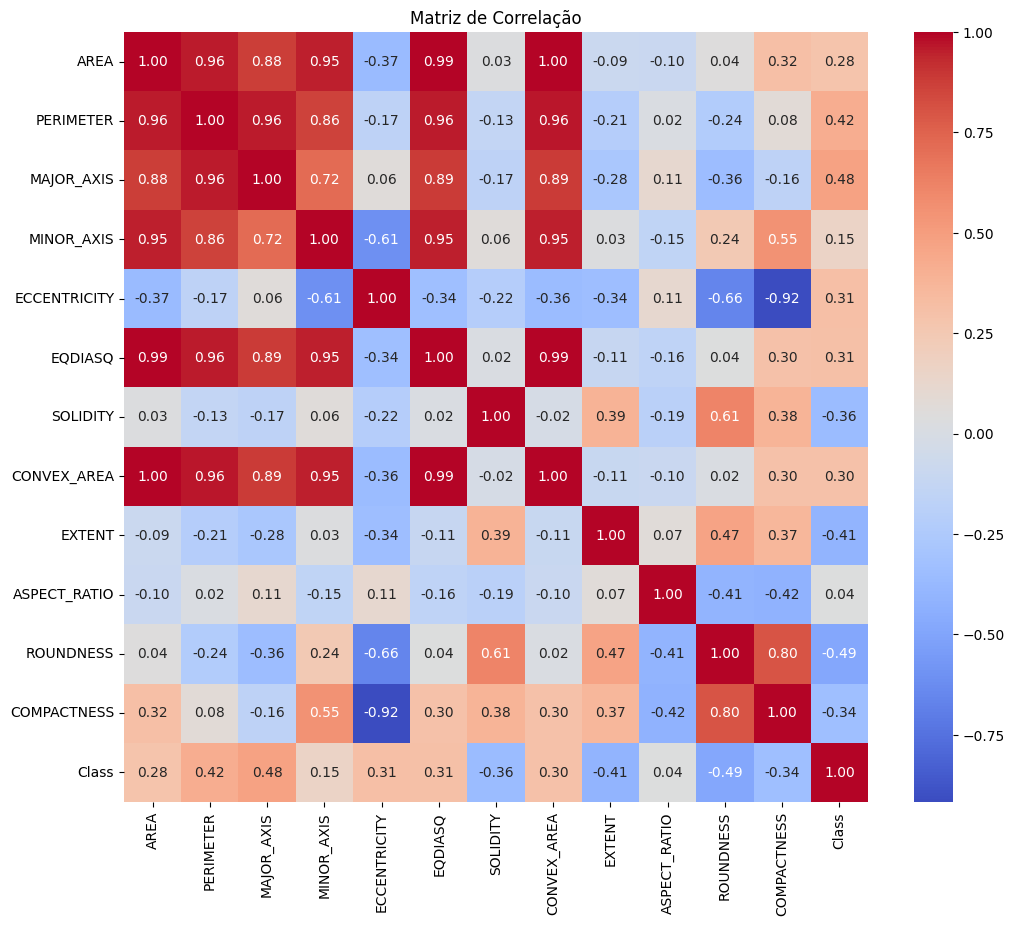

In [12]:
# Matriz de correlação (heatmap) Morfológica

# Calcula a matriz de correlação
df_grupo_morfo = df[grupo_morfo]
correlation_matrix = df_grupo_morfo.corr()

# Cria o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

* OBS: Não existe uma correlação muito alta com os campos morfologicos e a variavel target (Class), porém é possível observar que existe uma correlação alta entree os próprios campos, ex:EQDIASQ com CONVEX_AREA. Pois a correlação entre essas variaveis é igual a 0.95, muito próximo de 1. Logo, a utilização de apenas uma dela, já é suficiente para o trenamento dos dados.

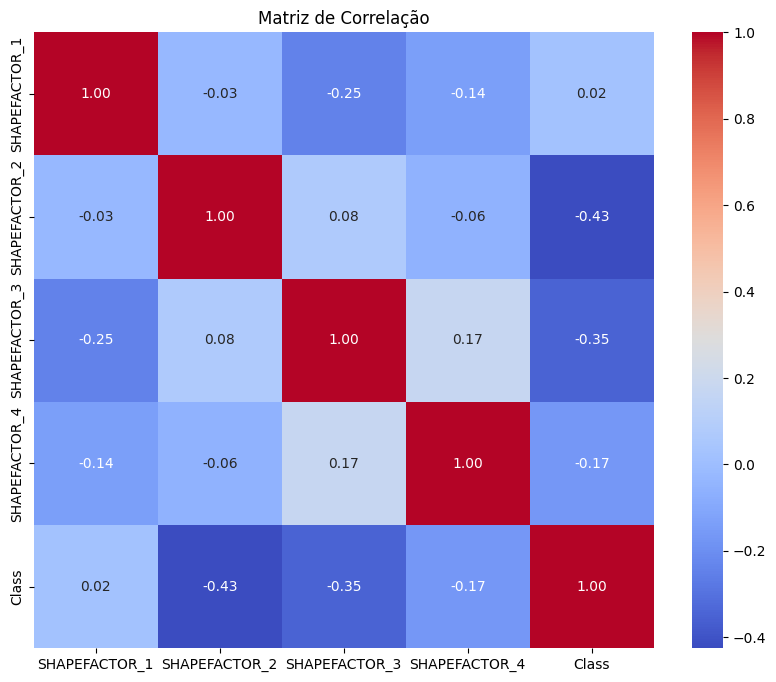

In [13]:
# Matriz de correlação (heatmap) Shape

# Calcula a matriz de correlação
df_grupo_shape= df[grupo_shape]
correlation_matrix = df_grupo_shape.corr()

# Cria o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

* OBS: Não existe uma alta correlação entrea  variável target(class) com as demais do dataset. Também não existe uma alta correlação entre as variáveis features.

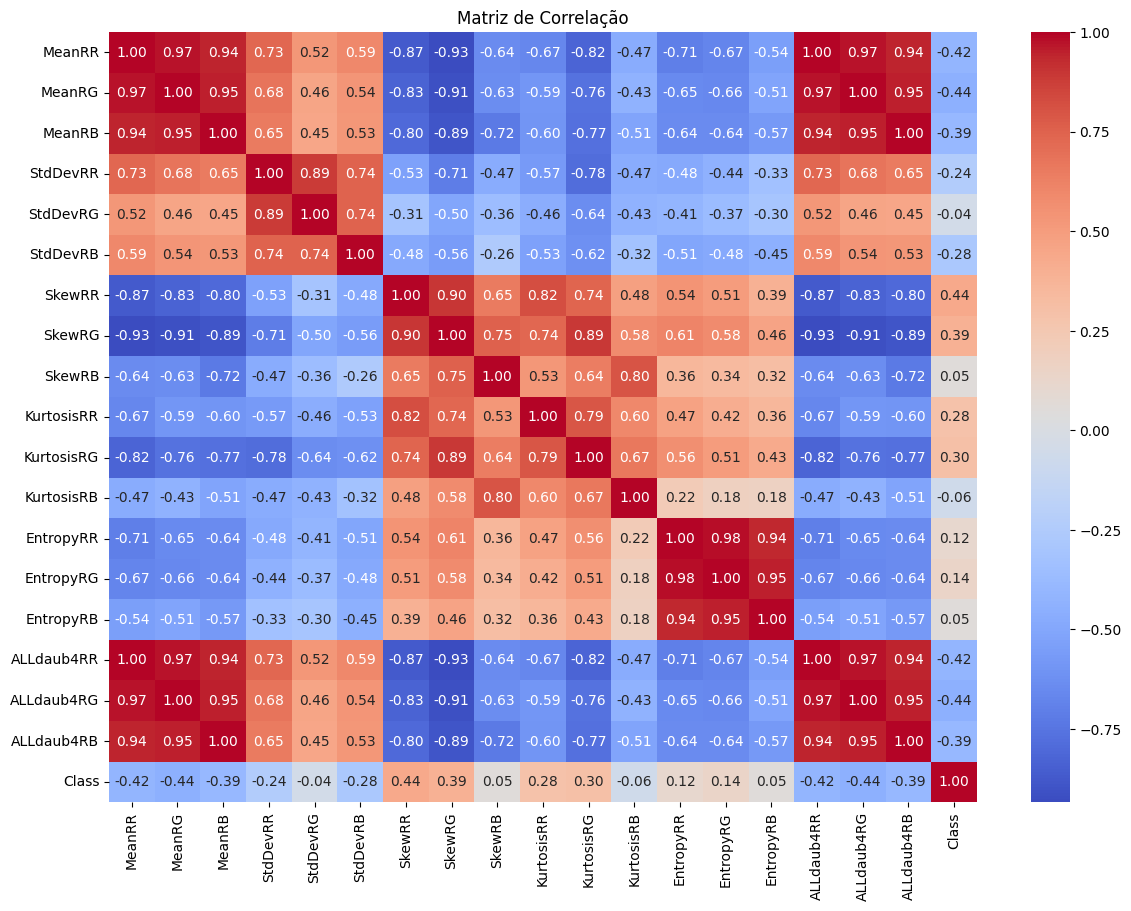

In [14]:
# Matriz de correlação (heatmap) Color

# Calcula a matriz de correlação
df_grupo_color= df[grupo_color]
correlation_matrix = df_grupo_color.corr()

# Cria o heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

* OBS: Não existe uma correlação muito alta com os campos de cores e a variável target (Class), porém é possível observar que existe uma correlação alta entre os próprios campos, ex:MeanRR com ALLdau4RR. Pois a correlação entre essas variáveis é igual a 1. Logo, a utilização de apenas uma dela, já é suficiente para o treinamento dos dados.

In [15]:
#Retirando as variáveis com alta correlação entre si
#Morfológica
df.drop(columns=['EQDIASQ', 'CONVEX_AREA'],inplace=True)
# Cor
df.drop(columns=['ALLdaub4RR','ALLdaub4RG','ALLdaub4RB'],inplace=True)
df.head(10)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,SOLIDITY,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,...,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,0.9947,0.7831,1.2976,0.9374,0.8750,...,-0.5661,-0.0114,0.6019,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,0
1,338136,2085.1440,723.8198,595.2073,0.5690,0.9974,0.7795,1.2161,0.9773,0.9065,...,-0.2328,0.1349,0.4134,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,0
2,526843,2647.3940,940.7379,715.3638,0.6494,0.9962,0.7657,1.3150,0.9446,0.8706,...,-0.7152,-0.1059,0.9183,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,0
3,416063,2351.2100,827.9804,645.2988,0.6266,0.9948,0.7759,1.2831,0.9458,0.8791,...,0.4584,1.2917,1.8028,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,0
4,347562,2160.3540,763.9877,582.8359,0.6465,0.9908,0.7569,1.3108,0.9358,0.8707,...,-0.3552,0.2101,0.8865,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,0
5,408953,2326.6931,840.1821,622.0076,0.6722,0.9974,0.7805,1.3508,0.9493,0.8589,...,0.1189,0.9400,1.5571,3.6309,6.0285,6.2159,-41140371456,-33146710016,-27907301376,0
6,451414,2457.2080,889.3253,652.4316,0.6796,0.9970,0.7877,1.3631,0.9395,0.8525,...,0.0606,0.4530,0.9431,3.0703,3.4163,4.9168,-63711666176,-64060743680,-52603465728,0
7,382636,2275.7791,808.0833,609.2819,0.6569,0.9931,0.7032,1.3263,0.9284,0.8638,...,-0.3332,0.9453,0.9929,3.6756,7.0258,5.3254,-29873577984,-33570080768,-33054025728,0
8,546063,2714.9480,916.3737,766.4536,0.5481,0.9882,0.7710,1.1956,0.9310,0.9099,...,-0.7543,-0.2394,0.3154,3.4640,3.7416,4.8120,-95262416896,-79321833472,-69569445888,0
9,420044,2391.1230,836.9280,645.1822,0.6370,0.9918,0.7853,1.2972,0.9232,0.8738,...,-0.3274,0.3495,1.1912,3.3729,4.2898,5.4637,-74341122048,-58172182528,-42640556032,0


In [16]:
df.shape

(898, 30)

* Normalização dos dados

In [17]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,SOLIDITY,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,...,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,Class
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,0.981840,0.736267,2.131102,0.857720,0.807190,...,0.089266,0.564139,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,3.279510
std,107245.205337,410.012459,144.059326,114.268917,0.088727,0.018157,0.053745,17.820778,0.070839,0.062175,...,0.943285,1.039813,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,1.803886
min,1987.000000,911.828000,336.722700,2.283200,0.344800,0.836600,0.512300,1.065300,0.004800,0.041100,...,-1.724200,-1.834400,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,0.000000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,0.978825,0.705875,1.373725,0.827750,0.768050,...,-0.549900,-0.230200,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,2.000000
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,0.987300,0.746950,1.524150,0.867750,0.804950,...,-0.162700,0.243750,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,4.000000
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,0.991800,0.775850,1.674750,0.899500,0.848875,...,0.471025,1.406550,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,5.000000
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,0.997400,0.856200,535.525700,0.977300,0.968100,...,3.223600,3.697100,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,6.000000


In [18]:
stand = MinMaxScaler()
df_norm = stand.fit_transform(df.drop(columns=['Class']))
df_norm = pd.DataFrame(df_norm, columns=df.drop(columns=['Class']).columns)
df_norm.head(10)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,SOLIDITY,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,...,StdDevRB,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB
0,0.772274,0.772079,0.565604,0.841941,0.446429,0.983209,0.787438,0.000435,0.958972,0.899569,...,0.670018,0.234064,0.329567,0.395739,0.062495,0.053715,0.080752,0.458253,0.455197,0.546327
1,0.617835,0.617480,0.436904,0.775906,0.342186,1.000000,0.776970,0.000282,1.000000,0.933549,...,0.616359,0.301427,0.356016,0.350002,0.037387,0.040885,0.046033,0.687312,0.599151,0.643352
2,0.964674,0.913374,0.681733,0.933143,0.464896,0.992537,0.736842,0.000467,0.966375,0.894822,...,0.771491,0.203929,0.312483,0.472509,0.083531,0.089677,0.096843,0.139263,0.194220,0.312066
3,0.761063,0.757502,0.554467,0.841456,0.430098,0.983831,0.766502,0.000408,0.967609,0.903991,...,0.677329,0.441125,0.565145,0.687121,0.136202,0.278800,0.213061,0.707125,0.657830,0.665214
4,0.635159,0.657060,0.482240,0.759716,0.460470,0.958955,0.711253,0.000459,0.957326,0.894930,...,0.590905,0.276689,0.369610,0.464794,0.040608,0.054459,0.086850,0.634560,0.615256,0.710963
5,0.747995,0.744600,0.568238,0.810977,0.499695,1.000000,0.779878,0.000534,0.971208,0.882201,...,0.741776,0.372509,0.501564,0.627505,0.078597,0.175928,0.145944,0.623919,0.646035,0.684376
6,0.826037,0.813286,0.623705,0.850790,0.510989,0.997512,0.800814,0.000557,0.961131,0.875297,...,0.769862,0.360726,0.413523,0.478527,0.055680,0.071976,0.103326,0.416767,0.310211,0.400625
7,0.699625,0.717805,0.532010,0.794324,0.476343,0.973259,0.555103,0.000488,0.949717,0.887487,...,0.419191,0.281135,0.502522,0.490610,0.080424,0.215615,0.116730,0.727323,0.641436,0.625242
8,1.000000,0.948926,0.654233,1.000000,0.310287,0.942786,0.752254,0.000244,0.952391,0.937217,...,0.647131,0.196027,0.288349,0.326224,0.071774,0.084921,0.099887,0.127203,0.144427,0.205692
9,0.768380,0.778507,0.564566,0.841303,0.445971,0.965174,0.793835,0.000434,0.944370,0.898274,...,0.812184,0.282307,0.394812,0.538725,0.068050,0.106737,0.121267,0.319213,0.374179,0.515096


## Criação do Dataset

In [19]:
# Separação das features e da variável target
x = df_norm.to_numpy()
y = df['Class'].values.reshape(-1,1)

In [20]:
x.shape

(898, 29)

In [21]:
y.shape

(898, 1)

## Criação do Dataset

In [22]:
class DateFruitss(Dataset):
  def __init__(self, x, y):
    super(DateFruitss, self).__init__()
    if(len(x) != len(y)):
      raise ValueError("Size de X e Y não dão match!")
    self.x = torch.FloatTensor(x)
    self.y = torch.LongTensor(y) # valor categórico

  def __getitem__(self, index):
     return self.x[index], self.y[index]

  def __len__(self):
    return len(self.x)

In [23]:
fruits = DateFruitss(x, y)
fruits

In [24]:
train_data, val_data = random_split(fruits, [0.7, 0.3])

In [25]:
print(f"len treinamento: {len(train_data)}")

len treinamento: 629


In [26]:
train_data[4]

(tensor([5.5745e-01, 6.2217e-01, 5.0533e-01, 6.4781e-01, 6.5415e-01, 9.3843e-01,
         5.9116e-01, 9.5798e-04, 8.9470e-01, 8.1305e-01, 1.4665e-03, 1.5625e-01,
         6.7336e-01, 9.8681e-01, 1.6097e-01, 1.2671e-01, 2.5475e-01, 1.9962e-01,
         3.1055e-01, 3.3387e-01, 4.2722e-01, 8.2511e-01, 4.6249e-01, 8.8534e-02,
         5.2598e-01, 1.0701e-01, 9.3633e-01, 9.0388e-01, 8.4289e-01]),
 tensor([5]))

In [27]:
print(f"len teste: {len(val_data)}")

len teste: 269


In [28]:
val_data[7]

(tensor([0.4921, 0.5473, 0.4767, 0.5907, 0.6975, 0.9826, 0.8002, 0.0011, 0.9099,
         0.7886, 0.0018, 0.1875, 0.6353, 0.9913, 0.7686, 0.6200, 0.6798, 0.5920,
         0.6548, 0.8093, 0.2828, 0.3369, 0.1870, 0.0319, 0.0113, 0.0178, 0.5645,
         0.5730, 0.5687]),
 tensor([6]))

## Criação da Rede

In [29]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(29, 87),
            nn.ReLU(),
            nn.Linear(87, 261),
            nn.ReLU(),
            nn.Linear(261, 783),
            nn.ReLU(),
            nn.Linear(783, 261),
            nn.ReLU(),
            nn.Linear(261, 87),
            nn.ReLU(),
            nn.Linear(87, 29),
            nn.ReLU(),
            nn.Linear(29, 7)
        )

    def forward(self, x):
        output = self.fc(x)
        #output = F.log_softmax(x, dim=1)
        return output

model = Net()

In [30]:
model

Net(
  (fc): Sequential(
    (0): Linear(in_features=29, out_features=87, bias=True)
    (1): ReLU()
    (2): Linear(in_features=87, out_features=261, bias=True)
    (3): ReLU()
    (4): Linear(in_features=261, out_features=783, bias=True)
    (5): ReLU()
    (6): Linear(in_features=783, out_features=261, bias=True)
    (7): ReLU()
    (8): Linear(in_features=261, out_features=87, bias=True)
    (9): ReLU()
    (10): Linear(in_features=87, out_features=29, bias=True)
    (11): ReLU()
    (12): Linear(in_features=29, out_features=7, bias=True)
  )
)

## Treinamento

### Criando o objeto de treinamento

In [42]:
def train(log_interval, dry_run, model, device, train_loader, optimizer, epoch, criterion):
    model.train()
    processed = 0  # contador de amostras processadas
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target.view(-1))
        loss.backward()
        optimizer.step()

        # Atualiza o contador de amostras processadas
        processed += len(data)

        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, processed, len(train_loader.dataset),
                100. * processed / len(train_loader.dataset), loss.item()))

        if dry_run:
            break


In [32]:
def test(model, device, test_loader, criterion):
    """
    Função que realiza o teste do modelo.
    """
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)

            # 1. Forward
            output = model(data)

            # 2. Calcular perda acumulada (loss por batch * número de amostras)
            test_loss += criterion(output, target.view(-1)).item() * data.size(0)

            # 3. Predições
            pred = output.argmax(dim=1)

            # 4. Acumular número de acertos
            correct += (pred == target.view(-1)).sum().item()

    # 5. Calcular perda média
    test_loss /= len(test_loader.dataset)

    # 6. Calcular acurácia global
    acc = 100. * correct / len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), acc))

    return acc

## Avaliação

In [49]:
use_cuda = torch.cuda.is_available() # verifica se há o ambiente cuda disponível

torch.manual_seed(1111) # gera uma semente aleatória

device = torch.device("cuda" if use_cuda else "cpu")

train_kwargs = {'batch_size': 300} # dicionario com o tamanho do batch de treino
test_kwargs = {'batch_size': 100} # dicionario com o tamanho do batch de teste

#utilização do cuda
if use_cuda:
    cuda_kwargs = {'num_workers': 1,
                    'pin_memory': True,
                    'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

# criação do dataloader
train_loader = torch.utils.data.DataLoader(train_data,**train_kwargs) # separar as amostras com o batch
test_loader = torch.utils.data.DataLoader(val_data, **test_kwargs) # separar as amostras com o batch

#modelo
model = Net().to(device)

# definição do otimizador (gradiente descendente)
optimizer = optim.SGD(model.parameters(), lr=0.1)

# função de custo
#criterion = nn.MSELoss()
#criterion = F.nll_loss()
criterion = nn.CrossEntropyLoss()

best_acc = test(model, device, test_loader,criterion)
# print(f'Best Loss: {best_loss}')

epochs = 500
# scheduler = StepLR(optimizer, step_size=1, gamma=0.7)

for epoch in range(1, epochs + 1):
    train(1, False, model, device, train_loader, optimizer, epoch, criterion)
    acc = test(model, device, test_loader, criterion)
    print(f'Acc: {acc}')
    print(f'Best Acc: {best_acc}')
    if acc > best_acc:
      best_acc = acc
      torch.save(model.state_dict(), "Datefruits.pt")


Test set: Average loss: 1.9553, Accuracy: 13/269 (5%)

Train Epoch: 1 [300/629 (48%)]	Loss: 1.961844
Train Epoch: 1 [600/629 (95%)]	Loss: 1.947868
Train Epoch: 1 [629/629 (100%)]	Loss: 1.947666

Test set: Average loss: 1.9460, Accuracy: 13/269 (5%)

Acc: 4.83271375464684
Best Acc: 4.83271375464684
Train Epoch: 2 [300/629 (48%)]	Loss: 1.944602
Train Epoch: 2 [600/629 (95%)]	Loss: 1.948583
Train Epoch: 2 [629/629 (100%)]	Loss: 1.959424

Test set: Average loss: 1.9347, Accuracy: 69/269 (26%)

Acc: 25.650557620817843
Best Acc: 4.83271375464684
Train Epoch: 3 [300/629 (48%)]	Loss: 1.940338
Train Epoch: 3 [600/629 (95%)]	Loss: 1.935889
Train Epoch: 3 [629/629 (100%)]	Loss: 1.945369

Test set: Average loss: 1.9234, Accuracy: 69/269 (26%)

Acc: 25.650557620817843
Best Acc: 25.650557620817843
Train Epoch: 4 [300/629 (48%)]	Loss: 1.932223
Train Epoch: 4 [600/629 (95%)]	Loss: 1.924996
Train Epoch: 4 [629/629 (100%)]	Loss: 1.957680

Test set: Average loss: 1.9144, Accuracy: 69/269 (26%)

Acc: 25.

In [50]:
aux = torch.load("Datefruits.pt")

In [51]:
aux

OrderedDict([('fc.0.weight',
              tensor([[-2.2247e-01, -3.4891e-01, -2.8988e-02,  ..., -4.6310e-04,
                        4.5424e-02, -1.5633e-01],
                      [-5.1851e-02, -4.4601e-02, -9.7086e-02,  ..., -1.2832e-01,
                       -1.1359e-01, -1.1062e-01],
                      [-3.6468e-02,  1.6017e-02,  9.6898e-02,  ..., -3.1280e-02,
                       -2.3265e-01,  8.0879e-02],
                      ...,
                      [ 1.5615e-01, -1.4250e-01, -3.1828e-02,  ..., -1.5402e-02,
                        5.7896e-02,  1.4865e-01],
                      [-3.4691e-02, -4.0797e-03, -9.3578e-02,  ..., -1.1493e-01,
                       -1.4050e-01, -9.0088e-02],
                      [ 2.7482e-02, -1.4846e-02, -1.9990e-01,  ..., -4.4362e-01,
                       -1.3260e-01, -4.6412e-01]], device='cuda:0')),
             ('fc.0.bias',
              tensor([-0.0236,  0.1248,  0.0342,  0.1274, -0.0722,  0.0389, -0.0215,  0.1496,
                 

# Conclusões

- Temos um dataset que contem varios tipo de frutas no qual o objetivo é criar um modelo que consiga prever a classificação do tipo de Tamara.
Notamos que não continha nenhum valor nulo e que algumas colunas se correlacionavam com outras. Logo, excluimos 5 colunas do dataset original.
- Primeiro, divimos o dataset em duas partes, sendo elas, treino(70%) e teste (30%). Após isso, normalizamos os dados com a função MinMaxscaler.
Com isso foi possível definir as nossas colunas features e target passando-as para array. Fizemos o processo de passar os dados da coluna target (class) de categórica para numérica.
- Daí, começamos a criar a rede com 7 camadas, transformando uma camada não linear em um linear atraves da função de ativação ReLu. Sendo que os valores que são negativos ficam 0 e os positivos são mantidos.
- Na parte do treinamento criamos duas funções, uma de treino e outra de teste. Na função de treino definimos o forward, critério (função de custo), o gradiente descendente e o processo de backpropagation. Com isso os pesos foram se reajustando e com maior destaque a partir da epoch acima de 150, ou seja, a medida que a epoca vai tendo um maior valor, a acurácia da validação aumenta.
Na de teste aplicamos a validação e configuramos o forward, assim como a perda acumulada e a acuracia global. Utilizamos o argmax para capturar o valor de maior probabilidade na predição da classe.
- E na avaliação realizamos o processo de chaamda das funções de treino e teste. Notamos que a acuracia global na última epoch foi de 86% com um lr de 0.1, com epoch 500 e batch size de 100 para teste e 300 para treino.
O valor da acuraria representa o bom resultado da rede neural e não identificamos nem overfitting e nem underfitting, pois a nossa perda não é muito próxima de 0 e nem a acurácia é próxima a 100%.


